<a href="https://colab.research.google.com/github/pgvishnu526/pgvishnu526/blob/main/decision_tree_classification_problem(tennis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#WEATHER PREDICTION FOR PLAYER

##importing required python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


##gathering dataset

In [3]:
data = pd.read_csv("tennis.csv")
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


###splitting the attribute as dependent and independent

In [4]:
x= data.iloc[:,:-1]
x

,outlook,temp,humidity,windy
0,sunny,hot,high,False
1,sunny,hot,high,True
2,overcast,hot,high,False
3,rainy,mild,high,False
4,rainy,cool,normal,False
5,rainy,cool,normal,True
6,overcast,cool,normal,True
7,sunny,mild,high,False
8,sunny,cool,normal,False
9,rainy,mild,normal,False


In [5]:
y= data.iloc[:,4]
y

,play
0,no
1,no
2,yes
3,yes
4,yes
5,no
6,yes
7,no
8,yes
9,yes


###Label encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
x=x.apply(le.fit_transform)
x

,outlook,temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


###splitting the dataset into training set and testing set

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=100)


##Model selection

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)
clf1=clf.fit(x_train,y_train)

In [9]:
y_pred=clf1.predict(x_test)

###Model evaluation and prediction

In [10]:
from sklearn.metrics import *
print(accuracy_score(y_test,y_pred))

0.3333333333333333


In [11]:
new_input=[['rainy','mild','high','false']]
new_input = pd.DataFrame(new_input, columns=x_train.columns)
for column in new_input.columns:
    new_input[column]=le.fit_transform(new_input[column])
op=clf1.predict(new_input)
print(op)

['yes']


###visualizing the tree

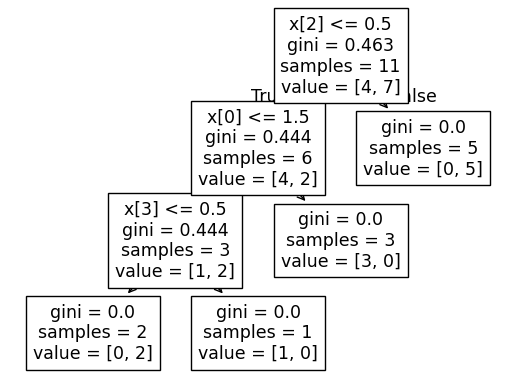

In [12]:
from sklearn import tree
fig = plt.figure()
tree.plot_tree(clf1)
plt.show()
